# Applied ML

We will apply Machine Learning to an interesting dataset about soccer players and referees.
The work will be divided in two parts, first a pre-processing + visualization pipeline to get comfortable with the data, and finally the prediction tasks, where the color of the skin of players will be inferered from other different parameters (features).

In [686]:
# A number of libraries will be used:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

### 1. Pre-processing and Visualization

#### 1.1 Pre-processing

In [687]:
#Loading the data to a DataFrame
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [688]:
# Just by descibing the data we notice how incomplete it is
df.describe()

/Users/vidit/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


Having in mind that our final goal is to predict the skintone, we can already get rid of all the rows that don't have this. Also we need to create an aggregate of the two raters scores to act as our labels for classification.

(array([ 46604.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  40258.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  12511.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   8642.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
          7442.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

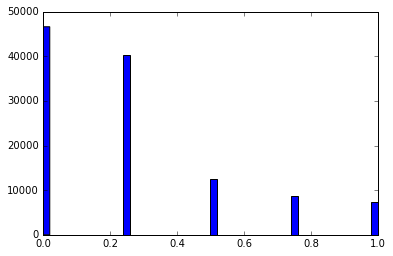

In [689]:
df1 = df.dropna(axis=0, how='any')
binwidth = 0.05
plt.hist(df1.rater1, 50)


(array([ 88365.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  26928.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
           164.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
         0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ]),
 <a list of 50 Patch objects>)

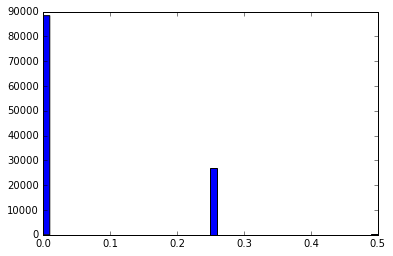

In [690]:
plt.hist(abs(df1.rater2-df1.rater1),50)

In [691]:
df.dropna(axis=0, subset=['rater1', 'rater2'], how='any',inplace=True)
df1 = df
#For the aggregate, the simplest thing is to compute the mean, although it will increase the possible "skintones" from
# 5 to 9! We multiply by 8 as a trick to make everything intergers instead of floats. This would be needed in randomForest.
df1['Skintone']= (df1['rater1']+df1['rater2'])*8/2 
df1.Skintone.value_counts()

2.0    38517
0.0    33723
1.0    17876
4.0     8989
8.0     7570
6.0     7079
3.0     5609
7.0     2841
5.0     2417
Name: Skintone, dtype: int64

There are many parameters that simply wont help to discriminate between skintone. We can dispose of them.

In [693]:
df1.drop('player', axis=1, inplace=True)      #The name is no use, we keep playerShort as the identifier
df1.drop('photoID', axis=1, inplace=True)     #Trash
df1.drop('rater1', axis=1, inplace=True)      #Not needed anymore
df1.drop('rater2', axis=1, inplace=True)      #Not needed anymore
# df1.drop('refNum', axis=1, inplace=True)      #Referee should be independent or at most correlated through country
# df1.drop('refCountry', axis=1, inplace=True)  #refCountry because it feels like cheating to look into the country of origin
df1.drop('Alpha_3', axis=1, inplace=True)     #Alpha_3 because it feels like cheating to look into the country of origin df1.drop('meanIAT', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
# df1.drop('nIAT', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
# df1.drop('seIAT', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed
# df1.drop('meanExp', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
# df1.drop('nExp', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
# df1.drop('seExp', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed

In [694]:
df1.describe()

/Users/vidit/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,Skintone
count,124575.000000,123868.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124468.000000,1.244680e+05,1.244680e+05,124468.000000,1.244680e+05,124468.000000,124621.000000
mean,182.125330,76.368102,2.993613,1.342663,0.714968,0.935982,0.353432,0.399170,0.012061,0.012751,1531.111546,29.488096,0.348123,1.817187e+04,6.287461e-04,0.463797,1.884147e+04,0.002988,2.268470
std,6.804843,7.188595,3.580429,1.879913,1.143873,1.422906,0.944250,0.821651,0.111052,0.113901,916.314559,27.963752,0.032087,1.261437e+05,4.788647e-03,0.219206,1.296022e+05,0.019719,2.308137
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001,0.000000
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1574.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2332.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660,8.000000


In [695]:
df1.shape

(124621, 24)

In [696]:
#we eliminate all the rows with missing values of interest
df2 = df1.dropna(axis=0, how='any')
df2.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,Skintone
count,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,1.154570e+05,1.154570e+05,115457.000000,1.154570e+05,115457.000000,115457.000000
mean,182.176135,76.517413,3.033761,1.371506,0.721134,0.941121,0.360351,0.404592,0.012290,0.012801,1532.497363,29.367124,0.348564,1.772543e+04,6.292873e-04,0.466222,1.837261e+04,0.002993,2.250968
std,6.855077,7.187210,3.641059,1.918978,1.155027,1.433641,0.960867,0.831051,0.112127,0.114175,916.310481,27.981717,0.032004,1.260788e+05,4.801956e-03,0.219350,1.295339e+05,0.019733,2.296664
min,161.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001,0.000000
25%,178.000000,72.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.335967,1.897000e+03,0.000225,0.000000
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1579.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586,2.000000
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2337.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002,3.000000
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660,8.000000


We have trashed around 10% of the data, but we believe it is acceptable as we still have over 100k entries left.

Now we will split the data in two, to make the aggregation by player easier. This is done separating sumable feature from those that are not summable. We asumme that the player remains in the same "club" (and the same "leagueCountry"  consequentially), with the same "position" for the entire season (2012-2013). We also assume honesty from the referees (no racism) which leads as to discard all the data related to the referee as it is assumed independent from the skintone.

In [668]:
#In both cases we keep the identifier
df_summable = df2.loc[:,["playerShort","games", "yellowCards", "yellowReds", "redCards"]]
df_non_summable = df2.loc[:,["playerShort","club", "leagueCountry","Skintone"]]


In [669]:
# And addition for the summables
df_g_summable = df_summable.groupby(['playerShort']).sum()
df_g_summable = df_g_summable.divide(df_g_summable.games,axis='index')
df_g_summable.head()

,games,yellowCards,yellowReds,redCards
playerShort,,,,
aaron-hughes,1.0,0.029052,0.000000,0.000000
aaron-hunt,1.0,0.125000,0.000000,0.002976
aaron-lennon,1.0,0.026699,0.000000,0.000000
aaron-ramsey,1.0,0.119231,0.000000,0.003846
abdelhamid-el-kaoutari,1.0,0.064516,0.032258,0.016129


In [670]:
# Simply drop duplicates for the non-summables
df_g_non_summable = df_non_summable.drop_duplicates(subset='playerShort', keep='first').set_index(['playerShort'])
df_g_non_summable.sort_index().head()

,club,leagueCountry,Skintone
playerShort,,,
aaron-hughes,Fulham FC,England,1.0
aaron-hunt,Werder Bremen,Germany,1.0
aaron-lennon,Tottenham Hotspur,England,2.0
aaron-ramsey,Arsenal FC,England,0.0
abdelhamid-el-kaoutari,Montpellier HSC,France,2.0


In [671]:
# We check that each has the same number of rows
print(df_g_summable.shape)
print(df_g_non_summable.shape)

(1419, 4)
(1419, 3)


In [672]:
# Merging the two again
df_by_player = pd.concat([df_g_non_summable, df_g_summable], axis=1, join='outer')
df_by_player.head()

,club,leagueCountry,Skintone,games,yellowCards,yellowReds,redCards
aaron-hughes,Fulham FC,England,1.0,1.0,0.029052,0.000000,0.000000
aaron-hunt,Werder Bremen,Germany,1.0,1.0,0.125000,0.000000,0.002976
aaron-lennon,Tottenham Hotspur,England,2.0,1.0,0.026699,0.000000,0.000000
aaron-ramsey,Arsenal FC,England,0.0,1.0,0.119231,0.000000,0.003846
abdelhamid-el-kaoutari,Montpellier HSC,France,2.0,1.0,0.064516,0.032258,0.016129


An extra transformation that seems reasonable is to change the "birthday" parameter for an "age" parameter

In [673]:
# Transform to datetime and substract to the season's year when we collected the data
df_by_player['age'] = pd.to_datetime(df_by_player.birthday).map(lambda x: 2012 - x.year)
df_by_player.describe()

AttributeError: 'DataFrame' object has no attribute 'birthday'

In [674]:
# We can now drop the "birthday" parameter
df_by_player.drop('birthday', axis=1, inplace=True)
df_by_player.head()

ValueError: labels ['birthday'] not contained in axis

The final step is to transform categorical variables to dummy variables, that are more friendly to machine learning algorithms. An important note is that this greatly increases the number of features due to the huge number of clubs, and makes us vulnerable to the curse of dimensionality as well as overfitting.

In [675]:
data = pd.get_dummies(df_by_player)
data.head()

,Skintone,games,yellowCards,yellowReds,redCards,club_1. FC Nürnberg,club_1. FSV Mainz 05,club_1899 Hoffenheim,club_AC Ajaccio,club_AS Nancy,...,club_Werder Bremen,club_West Bromwich Albion,club_West Ham United,club_Wigan Athletic,club_Wolverhampton Wanderers,club_Évian Thonon Gaillard,leagueCountry_England,leagueCountry_France,leagueCountry_Germany,leagueCountry_Spain
aaron-hughes,1.0,1.0,0.029052,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
aaron-hunt,1.0,1.0,0.125000,0.000000,0.002976,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aaron-lennon,2.0,1.0,0.026699,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
aaron-ramsey,0.0,1.0,0.119231,0.000000,0.003846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,2.0,1.0,0.064516,0.032258,0.016129,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The data is ready. Now we can do some extra visualizations or go directry to the machine learning tasks

#### 1.2 Visualization

### 2. Machine Learning

In [639]:
#Seed initialization for repeatability
np.random.seed(seed=42) #The answer is 42 ;)

Splitting the data into working blocks

In [640]:
from sklearn.cross_validation import train_test_split

# Firts lets separate our data in train and test sets:
d_train, d_test = train_test_split(data, test_size = 0.2)

# And now separate features from labels:
train  = d_train.drop('Skintone', axis=1)
tr_target = d_train.Skintone.values.tolist()
test = d_test.drop('Skintone', axis=1)
te_target = d_test.Skintone.values.tolist()
train

,games,yellowCards,yellowReds,redCards,leagueCountry_England,leagueCountry_France,leagueCountry_Germany,leagueCountry_Spain
boris-vukcevic,1.0,0.053571,0.000000,0.000000,0.0,0.0,1.0,0.0
fernando-gago,1.0,0.225610,0.006098,0.000000,0.0,0.0,0.0,1.0
fabian-giefer,1.0,0.066176,0.000000,0.014706,0.0,0.0,1.0,0.0
marco-terrazzino,1.0,0.067797,0.000000,0.000000,0.0,0.0,1.0,0.0
gennaro-bracigliano,1.0,0.056604,0.000000,0.006289,0.0,1.0,0.0,0.0
marko-marin,1.0,0.101449,0.000000,0.000000,1.0,0.0,0.0,0.0
alexander-hien,1.0,0.034483,0.000000,0.000000,0.0,0.0,1.0,0.0
bamba-anderson,1.0,0.077465,0.000000,0.000000,0.0,0.0,1.0,0.0
dean-whitehead,1.0,0.192020,0.007481,0.000000,1.0,0.0,0.0,0.0
xabi-alonso,1.0,0.242199,0.004458,0.001486,0.0,0.0,0.0,1.0


#### 2.1 Random Forest

In [641]:
from sklearn.metrics import confusion_matrix
def balanced_error(y_te,y_pred):
    cm = confusion_matrix(y_te,y_pred)
    ber = 0.0;
    total_cat = len(np.unique(y_te))
    for indx,row in enumerate(cm):
        if row.sum() != 0:
            ber = ber + (row.sum() - row[indx])/row.sum()
    ber = ber/total_cat
    return 1-ber
    

In [662]:
from sklearn.ensemble import RandomForestClassifier

'''
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
  n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]

'''

# Attempt 1
rf = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth= 10,oob_score=True)
rf.fit(train, tr_target)
te_pred = rf.predict(test)
print(balanced_error(te_target,te_pred))


0.120864247671


In [538]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [539]:
rf.feature_importances_

array([ 0.08132773,  0.08043733,  0.06958362,  0.        ,  0.09516998,
        0.09939476,  0.08760525,  0.0866421 ,  0.09808046,  0.06115275,
        0.06066709,  0.07949114,  0.00973939,  0.01059909,  0.00943292,
        0.00405397,  0.01243637,  0.00653773,  0.01163758,  0.00768287,
        0.00725435,  0.00933557,  0.00686571,  0.00487222])

For a 9-class classification, an accuracy close to 30% doesn't seem bad. But is it really? What if we only predict the most common Skintone?

In [540]:
d_train.Skintone.value_counts().iloc[1]/d_train.Skintone.count() # most common number counts / total counts

0.28105726872246695

After doing this check, we can now really tell that our classifier is actually doing nothing :(

We wonder if we are overfitting the data, a quick check is to see how good is the performance in train data. If it is much more accurate, it would be overfitting.

In [652]:
balanced_error(rf.predict(train), tr_target)

0.90324532804962798

Overfitting indeed

#### 2.2 Unsupervised Learning 

In [54]:
#kmeans k =2?